# **Analisa Pendapatan dan Pengiklanan pada suatu Official Store**

# A. Dataset

Dataset yang digunakan adalah ecommerce_sales.csv (https://github.com/obedsp/Penjualan-Ecommerce-Sales/blob/main/ecommerce_sales.csv). Dataset tersebut berisi data penjualan Smartphone, Laptop dan berbagai perangkat elektronik lainnya.

# B. Persiapan Data dan Library

## B.1. Import library yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## B.2. Import dataset

Dataset diimport dari file csv ke dalam dataset pandas

In [2]:
df = pd.read_csv('sample_data/ecommerce_sales.csv')

Menampilkan dataset yang sudah diimport

In [3]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Menampilkan ukuran dataset

In [4]:
# Jumlah baris dan kolom
df.shape

(186850, 6)

In [5]:
# Total ukuran dataset (hasil kali kolom dan baris)
df.size

1121100

## B.3. Mendeteksi Missing Value

Missing value merupakan element kosong atau tidak memiliki nilai dalam sebuah dataset. Missing value direpresentasikan dengan nilai NaN (Not a Number). Hal ini dapat menimbulkan kekeliruan atau error saat mengolah dataset tersebut. Jadi missing value harus ditangani terlebih dahulu sebelum diolah. Missing value ini dapat ditangani dengan cara menghapus atau menggantinya.



Sebuah dataset dapat memiliki baris yang sangat banyak yakni ratusan, ribuan bahkan jutaan, sehingga sulit untuk menemukan missing value. Untuk menemukan missing value dengan cepat kita dapat menggunakan fungsi *isnull()* atau *isna()*.

Fungsi *isna()* akan menghasilkan nilai TRUE jika nilai yang direferensikan adalah NaN dan sebaliknya jika nilai yang direferensikan bukan NaN maka akan menghasilkan nilai FALSE

In [6]:
df.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


Kolom yang memiliki nilai NaN dapat ditemukan dengan menambahkan fungsi *any()*.

In [7]:
df.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [8]:
# Tampilan baris dan kolom yang memiliki missing value
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


Jumlah baris pada tiap kolom yang memiliki nilai NaN dapat dihitung menggunakan fungsi *sum()*.

In [9]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Dan jumlah keseluruhan nilai NaN dalam dataset tersebut.

In [10]:
df.isna().sum().sum()

3270

## B.4 Tipe Data

Tipe data dari dataset dapat diketahui menggunakan fungsi .dtypes

In [11]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Semua isi dari dataset tersebut adalah object, dimana data tersebut belum dapat diolah. Type data tiap kolom dapat diubah menjadi dtring, float, integer, datetime dan lain-lain berdasarkan kebutuhan. Konversi type data dapat dilakukan sebagai berikut.

In [12]:
df['Order ID'] = pd.to_numeric(df['Order ID'],errors = 'coerce').astype('Int64')
df['Price Each'] = pd.to_numeric(df['Price Each'],errors = 'coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce',format= "%m/%d/%y %H:%M")
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],errors = 'coerce').astype('Int64')
df['Product'] = df['Product'].astype('string')
df['Purchase Address'] = df['Purchase Address'].astype('string')

Setelah dikonversi, type data dapat dicek lagi untuk memastikan hasilnya.

In [13]:
df.dtypes

Order ID                     Int64
Product                     string
Quantity Ordered             Int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            string
dtype: object

Missing value juga dapat dicek ulang, untuk memastikan apakah ada missing value setelah konversi type data.

In [14]:
df.isna().sum()

Order ID            900
Product             545
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    545
dtype: int64

In [15]:
df.isna().sum().sum()

4690

## B.5. Menghapus Missing Value

Baris yang mengandung missing value dapat dihapus menggunakan fungsi *dropna()*.

In [16]:
df_clean = df.dropna()

Untuk memastikan dataset sudah bersih dari nilai NaN, dapat dicek ulang menggunakan fungsi *isna().any()* dan jumlahnya menggunakan fungsi *isna().sum().sum()*.

In [17]:
df_clean.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [18]:
df_clean.isna().sum().sum()

0

# C. Pendapatan Tertinggi dan Terendah

## C.1. Pendapatan

Pendapatan tertinggi dapat diperoleh dengan data Quantity Ordered dan Price Each. Kedua data tersebut dikalikan untuk memperoleh pendapatan.

Untuk pendapatan pada tiap baris pada dataset dibuat pada kolom baru yang merupakan hasil kali kolom Quantity Ordered dengan Price Each.

In [19]:
df_clean['Income'] = df_clean['Price Each'] * df_clean['Quantity Ordered']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_clean

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Income
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.9
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.0
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


## C.2. Pendapatan per Bulan

Kita dapat mengetahui pendapatan per bulan dengan metode grouping menggunakan fungsi *.groupby().* Pendapatan per bulan dikelompokkan berdasarkan bulan dan disertakan tahun juga menggunakan fungsi *.dt.strftime('%Y-%m')*.

In [35]:
income_M = df_clean.groupby(df_clean['Order Date'].dt.strftime('%Y-%m'))[['Income']].sum().reset_index()
income_M.rename(columns = {'Order Date':'Year-Month'}, inplace = True)
income_M

,Year-Month,Income
0,2019-01,1813586.44
1,2019-02,2202022.42
2,2019-03,2807100.38
3,2019-04,3390670.24
4,2019-05,3152606.75
5,2019-06,2577802.26
6,2019-07,2647775.76
7,2019-08,2244467.88
8,2019-09,2097560.13
9,2019-10,3736726.88


## C.3. Pendapatan tertinggi dan terendah

Pendapatan tertinggi dan terendah dapat ditentukan dengan menerapkan fungsi .aggregate() pada hasil grouping tadi.

In [36]:
income_M.aggregate(['max','min'])

,Year-Month,Income
max,2020-01,4613443.34
min,2019-01,8670.29


Pendapatan tertinggi berada pada bulan 12 tahun 2019 sebesar 4613443.34 dan pendapatan terendah berada pada bulan 1 tahun 2020 sebesar 8670.29.

## C.4. Visualisasi Pendapatan per Bulan

Pendapatan per bulan dapat divisualisasikan menggunakan *matplotlib*.

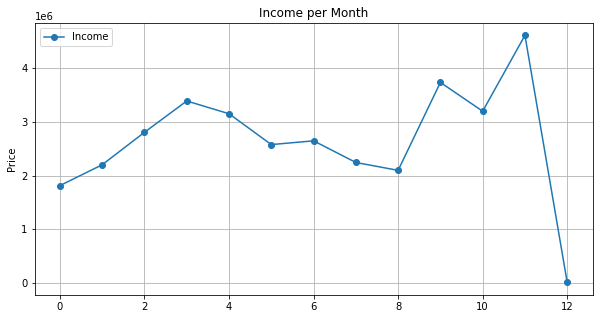

In [37]:
income_M.plot(kind='line',legend=True, marker='o',figsize=(10,5))
plt.title('Income per Month')
plt.ylabel('Price')
plt.grid()
plt.show()

Dari diagram di atas terlihat pendapatan mengalami peningkatan dari bulan Januari 2019 hingga April 2019. Tren penurunan pendapatan terjadi dari bulan Mei 2019 hingga September 2019 lalu mengalami peningakatan kembali hingga Desember 2019. Perubahan ini bisa disebabkan oleh minat pembeli.

Penurunan pendapatan yang sangat drastis terjadi pada bulan Januari 2020. Hal ini bisa disebabkan oleh beberapa hal seperti pandemi, krisis, dan lain sebagainya.

# D. Produk yang laris terjual dan tidak laris terjual

## D.1. Produk

Jumlah orderan tiap produk dan pendapatan dapat ditentukan dengan melakukan grouping jumlah Quantity Ordered dan Income berdasarkan Product.

In [29]:
produk = df_clean.groupby('Product')[['Quantity Ordered','Income']].sum().reset_index()
produk

,Product,Quantity Ordered,Income
0,20in Monitor,4129,454148.71
1,27in 4K Gaming Monitor,6244,2435097.56
2,27in FHD Monitor,7550,1132424.5
3,34in Ultrawide Monitor,6199,2355558.01
4,AA Batteries (4-pack),27635,106118.4
5,AAA Batteries (4-pack),31017,92740.83
6,Apple Airpods Headphones,15661,2349150.0
7,Bose SoundSport Headphones,13457,1345565.43
8,Flatscreen TV,4819,1445700.0
9,Google Phone,5532,3319200.0


## D.2. Produk terlaris dan tidak laris

Produk yang terlaris dan tidak laris dapat ditentukan dengan menambahkan fungsi .aggregate() pada hasil grouping Product.

In [42]:
produk[['Quantity Ordered','Income']].aggregate(['min','max'])

,Quantity Ordered,Income
min,646,92740.83
max,31017,8037600.00


Berdasarkan Quantity Ordered, produk yang paling laris adalah AAA Batteries (4-pack) dengan jumlah order sebesar 31017 dan produk yang tidak laris adalah LG Dryer dengan jumlah order sebesar 646.
Berdasarkan Income/Pendapatan, produk yang paling laris adalah Macbook Pro Laptop dan yang kurang laris adalah AAA Batteries (4-pack).

## D.3. Visualisasi Jumlah Order dan Pendapatan tiap Produk

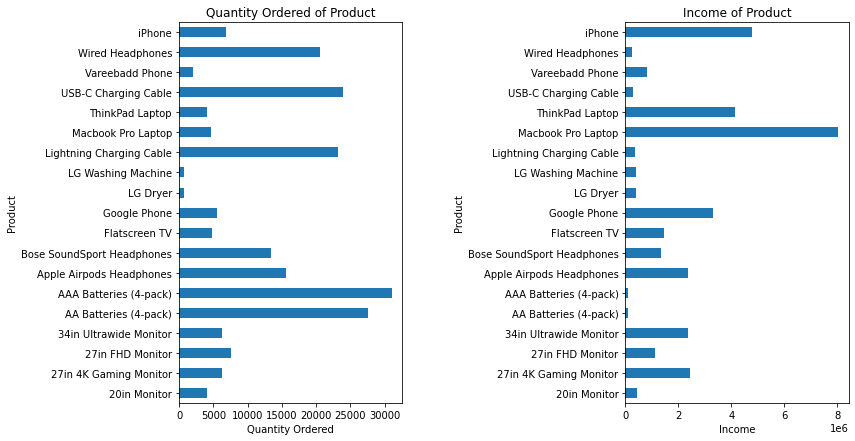

In [68]:
fig = plt.figure(figsize=(12,7))
# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)
# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(122)

produk.plot(kind='barh',x='Product', y='Quantity Ordered',ax=ax1,legend=False)
ax1.set_title('Quantity Ordered of Product')
ax1.xaxis.set_label_text('Quantity Ordered')
produk.plot(kind='barh',x='Product', y='Income' ,ax=ax2,legend=False)
ax2.set_title('Income of Product')
ax2.xaxis.set_label_text('Income')
fig.subplots_adjust(wspace=1)
plt.show()

Pada diagram Quantity Ordered terlihat produk yang laris terjual adalah AAA Batteries, sedangkan produk yang kurang laris terjual adalah Washing Machine dan Dryer.
Jika ditinjau dari diagram Income, produk AAA Batteries yang orderannya banyak justru pendapatannya paling sedikit dan produk Macbook Pro Laptop yang memiliki pendapatan tertinggi. Hal ini dikarenakan perbedaan harga tiap produk.

Jadi, laris atau kurang larisnya suatu produk dapat dilihat berdasarkan jumlah orderan dan pendapatan.

# E. Pengiklanan Produk

## E.1. Pengiklanan berdasarkan bulan

Pengelompokan Quantity Ordered berdasarkan bulan.

In [34]:
iklan_bln = df_clean.groupby(df_clean['Order Date'].dt.strftime('%Y-%m'))[['Quantity Ordered']].sum().reset_index()
iklan_bln.rename(columns = {'Order Date':'Year-Month'}, inplace = True)
iklan_bln

,Year-Month,Quantity Ordered
0,2019-01,10862
1,2019-02,13449
2,2019-03,17005
3,2019-04,20558
4,2019-05,18667
5,2019-06,15253
6,2019-07,16072
7,2019-08,13448
8,2019-09,13109
9,2019-10,22703


Grafik pergerakan Quantity Ordered tiap bulan

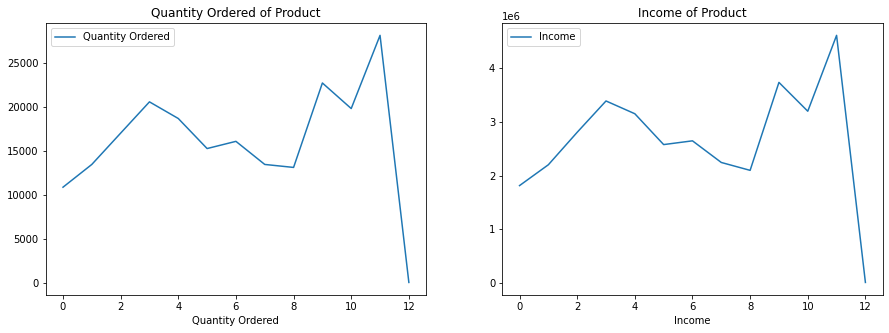

In [64]:
fig = plt.figure(figsize=(15,5))
# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)
# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(122)

iklan_bln.plot(kind='line', ax=ax1)
ax1.set_title('Quantity Ordered of Product')
ax1.xaxis.set_label_text('Quantity Ordered')
income_M.plot(kind='line', ax=ax2)
ax2.set_title('Income of Product')
ax2.xaxis.set_label_text('Income')
plt.show()

Dari kedua grafik di atas terlihat perubahan pendapatan sebanding dengan jumlah barang yang terjual.

Untuk melakukan pengiklanan membutuhkan beberapa hal, salah satunya adalah budget. Selain itu, minat pembeli perlu diperhitungkan dengan melihat grafik jumlah barang yang terjual.

Berdasarkan grafik pendapatan per bulan, yang tinggi berada pada bulan Oktober dan Desember. Sehingga dapat dikatakan bahwa pengiklanan cocok dilakukan menjelang akhir tahun karena pendapatan yang diperoleh menjelang akhir tahun sangat tinggi, dimana perusahaan memiliki budget yang lebih untuk pengiklanan. Selain itu, barang yang kurang laris pada awal tahun (berdasarkan grafik di atas), bisa mengalami peningkatan.

## E.2. Pengiklanan berdasarkan jam

Pengelompokkan Quantity Ordered berdasarkan jam

In [43]:
iklan_jam = df_clean.groupby(df_clean['Order Date'].dt.hour)[['Quantity Ordered']].sum().reset_index()

Grafik Quantity Ordered berdasarkan tiap jam

<function matplotlib.pyplot.show>

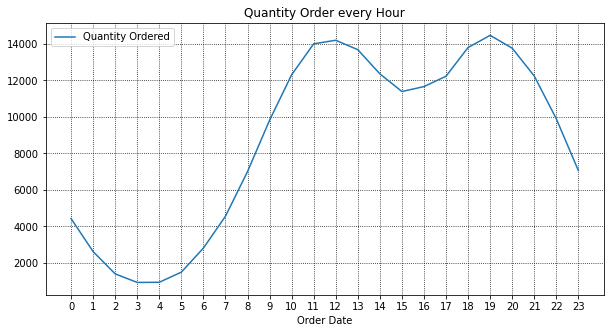

In [44]:
iklan_jam.plot(x='Order Date',figsize=(10,5))
plt.xticks(iklan_jam['Order Date'])
plt.title('Quantity Order every Hour')
plt.grid(ls=':',color='k')
plt.show

Pada grafik di atas dapat dilihat jumlah pembeli yang tinggi terjadi pada 12 siang dan jam 7 malam. Sehingga untuk melakukan pengiklanan dapat dilakukan menjelang siang hari atau pada sore hari.